# **PORTFOLIO OPTIMISATION**

## **Thesis Meeting 2**
### Muhammad Noerrahman
### Thesis Advisor: Thesis Advisor: Prof. Dr. Eduardus Tandelilin, MBA 

In [2]:
import numpy as np
import pandas as pd
import math
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import investpy as ipy
%matplotlib inline
import datetime as dt
import statsmodels.api as sm   
import pandas
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
today = dt.datetime.today().strftime("%d/%m/%Y")
import mlportfolio

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (/Users/rizz/opt/anaconda3/envs/mlstocks/lib/python3.9/site-packages/pandas/core/dtypes/generic.py)

In [3]:
#pd.set_option('display.max_rows', 100)

### Lists of Stocks 

In [4]:
TELC = ['TLKM.JK', 'EXCL.JK', 'ISAT.JK', 'FREN.JK', 'KBLV.JK']
TOP5 = ['BBRI.JK', 'BBCA.JK', 'ANTM.JK', 'BMRI.JK','KAEF.JK']
BANK = ['BBRI.JK', 'BBCA.JK', 'BMRI.JK', 'BBTN.JK', 'BBNI.JK']
CURR = ['ASII.JK', 'BBRI.JK', 'BBNI.JK', 'TLKM.JK']

Here, the most up-to-date list of Kompas 100 stocks is collected from Kontan. Kompas 100 was chosen as the stocks universe as it provides a larger dataset than LQ45 or IDX30 yet manageable enough for the computational  resource available for the research in comparison to the 600+ of stocks listed on IDX.

In [6]:
lis = mlportfolio.index_list_kontan('KOMPAS100')
df = lis.download()
df

,No.,Kode,Nama Saham,Keterangan
0,1,AALI,Astra Agro Lestari Tbk.,
1,2,ACES,Ace Hardware Indonesia Tbk.,
2,3,ADRO,Adaro Energy Tbk.,
3,4,AKRA,AKR Corporindo Tbk.,
4,5,ANTM,Aneka Tambang Tbk.,
...,...,...,...,...
95,96,WIKA,Wijaya Karya (Persero) Tbk.,
96,97,WOOD,Integra Indocabinet Tbk.,
97,98,WSBP,Waskita Beton Precast Tbk.,
98,99,WSKT,Waskita Karya (Persero) Tbk.,


In [7]:
code = df['Kode']
code_arr =[]
sym = []
for i in range(len(code)):
  sym.append(code[i])
  code_arr.append(code[i]+'.JK')

## **Data Reader**

After the list of stocks has been collected, using `yfinance` module to download the historical time series data from Yahoo Finance. The data collected for these stocks span from 1 Jan 2010 to today.

### **KOMPAS100 Stocks Prices: 2010-2021**

In [8]:
df1 = yf.download(code_arr, start='2010-01-01')
df1.info()

[*********************100%***********************]  100 of 100 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2857 entries, 2010-01-04 to 2021-08-03
Columns: 600 entries, ('Adj Close', 'AALI.JK') to ('Volume', 'WTON.JK')
dtypes: float64(600)
memory usage: 13.1 MB


<AxesSubplot:xlabel='Date', ylabel='Adj Close Price'>

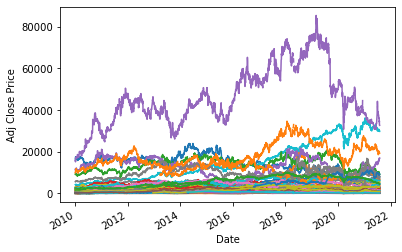

In [9]:
df1['Adj Close'].plot(legend=False, xlabel='Date', ylabel='Adj Close Price' )

In [10]:
df1['Adj Close'].describe()

,AALI.JK,ACES.JK,ADRO.JK,AKRA.JK,ANTM.JK,APIC.JK,APLN.JK,ASII.JK,ASSA.JK,BBCA.JK,...,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIIM.JK,WIKA.JK,WOOD.JK,WSBP.JK,WSKT.JK,WTON.JK
count,2847.000000,2803.000000,2842.000000,2843.000000,2842.000000,2529.000000,2626.000000,2839.000000,2134.000000,2844.000000,...,2466.000000,2846.000000,2845.000000,906.000000,2103.000000,2841.000000,1015.000000,1200.000000,2110.000000,1792.000000
mean,14460.507607,869.355978,1056.514151,3555.830723,1024.626535,337.917379,261.214895,5729.324138,410.752145,15490.266113,...,3422.886400,18235.479053,5979.515032,234.105417,404.740933,1545.711142,540.228571,313.401539,1437.511366,583.693319
std,3515.980721,477.089025,335.513555,1465.476406,478.056113,255.500836,88.060894,1185.835307,441.408708,8996.606353,...,3266.777869,5504.726690,2343.142531,54.015104,186.117428,726.998918,216.197370,95.225810,650.570314,254.187581
min,4179.548828,110.668404,318.090973,566.083374,278.410828,40.359379,79.000000,2402.051758,86.170639,3844.957275,...,301.077087,9770.570312,1635.380371,118.225822,71.271675,228.467911,210.000000,104.051315,351.523560,181.596130
25%,12006.521484,550.649170,796.256165,2780.914307,727.554443,117.551582,188.250000,5146.484375,185.397400,7786.438110,...,519.716309,13889.119141,3817.632568,195.773788,256.844925,961.831421,350.000000,245.454613,746.445007,364.654808
50%,14232.994141,752.653931,1116.186646,3638.007324,889.199554,221.418930,263.295074,5810.900879,253.146347,12233.380371,...,1214.072144,16454.871094,6460.369141,224.752480,377.222107,1642.922363,560.000000,330.332123,1519.454468,521.832336
75%,16729.275391,1285.834717,1285.013824,4615.889648,1212.408447,520.000000,326.526306,6562.873535,484.000000,22690.899902,...,5626.018066,21965.557129,7963.514648,273.397217,525.014282,2154.493896,750.000000,377.788857,1972.393555,793.893799
max,23979.144531,1826.001221,2000.058594,6933.384277,3166.982666,1040.000000,495.147675,8138.813965,2560.000000,36217.312500,...,11180.783203,34661.660156,10201.591797,393.470306,1065.000000,3171.849121,980.000000,514.747437,2895.287842,1218.090820


### **KOMPAS 100 Index Prices: 2010-2021**

In [8]:
df2 = ipy.indices.get_index_historical_data(index='IDX KOMPAS 100', country='Indonesia', from_date='01/01/2010', to_date= today)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2834 entries, 2010-01-04 to 2021-08-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2834 non-null   float64
 1   High      2834 non-null   float64
 2   Low       2834 non-null   float64
 3   Close     2834 non-null   float64
 4   Volume    2834 non-null   int64  
 5   Currency  2834 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 155.0+ KB


In [9]:
df2.describe()

,Open,High,Low,Close,Volume
count,2834.000000,2834.000000,2834.000000,2834.000000,2.834000e+03
mean,1049.414411,1055.963200,1041.773038,1049.044933,3.879278e+09
std,174.628054,174.154034,174.488473,173.982609,3.366317e+10
min,591.860000,595.920000,580.380000,592.090000,0.000000e+00
25%,917.455000,922.767500,909.505000,917.527500,2.245404e+09
50%,1063.820000,1069.210000,1057.015000,1063.095000,2.901965e+09
75%,1193.667500,1201.222500,1187.730000,1193.740000,3.788222e+09
max,1420.940000,1421.950000,1406.810000,1421.500000,1.793415e+12


<AxesSubplot:xlabel='Date'>

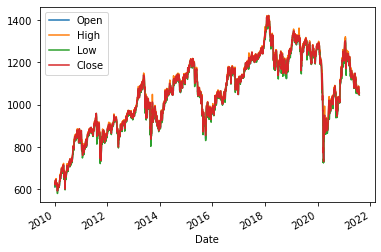

In [10]:
df2.iloc[:, :4].plot()

### **Indonesia Gov't Bond Yield 3 Year: 2010-2021**

Here, the bond yields of Indonesia's 3 Year Bond from 1 Jan 2010 to today are collected from Investing.com. 

In [11]:
df5 = ipy.bonds.get_bond_historical_data(bond = 'INDONESIA 3Y', from_date='01/01/2010', to_date= today)
bond_yield = df5[df5.index.isin(df2.index)]

<AxesSubplot:xlabel='Date', ylabel='%'>

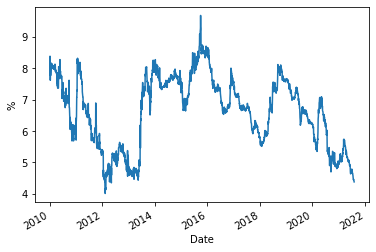

In [12]:
bond_yield['Close'].plot(legend=False, ylabel='%')

### **Financial Summaries of KOMPAS100 Companies**

In [13]:
info_summ = pd.DataFrame()
fin_dict = {}

for x in sym: 
    info = ipy.stocks.get_stock_information(stock= x, country= 'Indonesia')
    info_summ = info_summ.append(info)
    
    try:
        inc_sta = ipy.stocks.get_stock_financial_summary(stock= x, country= 'Indonesia', summary_type='income_statement')
        fin_dict[x +'.JK']= inc_sta.T
    except:
        pass

In [119]:
fin_summ = pd.concat(fin_dict)*1000000 #Values should be in millions IDR
info_summ.reset_index(drop=True)
info_summ.index = code_arr

In [15]:
info_summ.head(10)

,Stock Symbol,Prev. Close,Todays Range,Revenue,Open,52 wk Range,EPS,Volume,Market Cap,Dividend (Yield),Average Vol. (3m),P/E Ratio,Beta,1-Year Change,Shares Outstanding,Next Earnings Date
AALI.JK,AALI,7950.0,"7,900-8,100",2.056000e+13,7950.0,"7,275-13,350",566.60,1163700.0,1.545000e+13,153.00(1.92%),2312252.0,14.03,1.63,-18.04%,1.924688e+09,25/10/2021
ACES.JK,ACES,1320.0,"1,290-1,325",5.450000e+12,1320.0,"1,235-1,850",42.60,9038000.0,2.234000e+13,32.15(2.44%),14695867.0,30.98,0.63,-24.57%,1.712039e+10,03/08/2021
ADRO.JK,ADRO,1335.0,"1,340-1,390",3.479000e+13,1345.0,"1,010-1,600",50.54,86145100.0,4.382000e+13,66.60(4.99%),77813248.0,26.42,1.21,23.04%,3.198596e+10,30/08/2021
AKRA.JK,AKRA,3600.0,"3,430-3,690",1.648000e+13,3610.0,"2,450-3,770",253.67,10113800.0,1.393000e+13,135.00(3.75%),6752238.0,14.19,1.78,25%,3.947434e+09,01/11/2021
ANTM.JK,ANTM,2520.0,"2,440-2,520",3.138000e+13,2520.0,"680-3,440",85.79,79180000.0,6.032000e+13,16.74(0.66%),123894219.0,29.37,2.36,245.21%,2.403076e+10,01/09/2021
APIC.JK,APIC,835.0,830-850,1.870000e+12,835.0,685-950,10.05,9362100.0,9.880000e+12,N/A(N/A),11249237.0,83.05,-0.14,0%,1.176631e+10,-
APLN.JK,APLN,129.0,125-130,4.120000e+12,129.0,93-232,0.97,8970700.0,2.880000e+12,N/A(N/A),22408565.0,132.59,2.14,10.26%,2.269933e+10,04/08/2021
ASII.JK,ASII,4720.0,"4,730-4,820",1.926500e+14,4730.0,"4,310-6,925",336.36,39192600.0,1.951300e+14,114.00(2.42%),40554710.0,14.03,1.24,-8.35%,4.048355e+10,01/11/2021
ASSA.JK,ASSA,2400.0,"2,280-2,440",3.300000e+12,2420.0,"450-2,760",25.02,12371400.0,8.150000e+12,N/A(N/A),16424690.0,95.92,2.23,348.6%,3.397500e+09,-
BBCA.JK,BBCA,29850.0,"29,525-30,325",4.488000e+13,30300.0,"26,950-36,900",1190.30,23996300.0,7.347200e+14,530.00(1.78%),15347352.0,25.08,0.92,-4.33%,2.465501e+10,28/10/2021


In [120]:
fin_summ.T

Date                        2020-12-31    2019-12-31    2018-12-31  \
AALI.JK Total Revenue     1.880704e+13  1.745274e+13  1.908439e+13   
        Gross Profit      2.962891e+12  2.144506e+12  3.539506e+12   
        Operating Income  1.876557e+12  1.028365e+12  2.180324e+12   
        Net Income        8.330900e+11  2.111170e+11  1.438511e+12   
ACES.JK Total Revenue     7.412767e+12  8.142717e+12  7.239754e+12   
...                                ...           ...           ...   
WSKT.JK Net Income       -7.378554e+12  9.381424e+11  3.962838e+12   
WTON.JK Total Revenue     4.803359e+12  7.083384e+12  6.930628e+12   
        Gross Profit      3.095229e+11  9.507170e+11  8.824219e+11   
        Operating Income  2.477098e+11  7.856503e+11  7.325459e+11   
        Net Income        1.280525e+11  5.123467e+11  4.863531e+11   

Date                        2017-12-31  
AALI.JK Total Revenue     1.730569e+13  
        Gross Profit      4.145250e+12  
        Operating Income  2.992440e+12  
        Net Income        1.968027e+12  
ACES.JK Total Revenue     5.938576e+12  
...                                ...  
WSKT.JK Net Income        3.881712e+12  
WTON.JK Total Revenue     5.362263e+12  
        Gross Profit      6.666394e+11  
        Operating Income  5.303587e+11  
        Net Income        3.371242e+11  

[367 rows x 4 columns]

In [121]:
avg_growth = fin_summ.T.pct_change().dropna().mean()

## **Daily Returns of Stocks**

In [17]:
close_price = df1['Adj Close']
close_price

,AALI.JK,ACES.JK,ADRO.JK,AKRA.JK,ANTM.JK,APIC.JK,APLN.JK,ASII.JK,ASSA.JK,BBCA.JK,...,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIIM.JK,WIKA.JK,WOOD.JK,WSBP.JK,WSKT.JK,WTON.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16575.072266,124.082756,1063.347290,767.357300,1601.085693,78.367722,NaN,2538.695557,NaN,4291.057617,...,385.551270,9993.353516,1673.236084,NaN,NaN,247.194733,NaN,NaN,NaN,NaN
2010-01-05,16818.310547,124.921127,1087.652344,754.777588,1601.085693,78.367722,NaN,2553.079102,NaN,4333.542969,...,394.119049,10247.958984,1726.234985,NaN,NaN,247.194733,NaN,NaN,NaN,NaN
2010-01-06,16748.814453,125.759552,1093.728638,748.488037,1601.085693,NaN,NaN,2538.695557,NaN,4206.086914,...,389.835205,10216.135742,1711.092285,NaN,NaN,247.194733,NaN,NaN,NaN,NaN
2010-01-07,17409.035156,124.921127,1118.033447,735.908325,1635.891479,NaN,NaN,2459.585938,NaN,4227.329102,...,389.835205,10088.831055,1680.807739,NaN,NaN,247.194733,NaN,NaN,NaN,NaN
2010-01-08,17548.033203,124.921127,1190.948975,729.618530,1635.891479,NaN,NaN,2473.969971,NaN,4121.115234,...,419.822540,10438.917969,1688.379150,NaN,NaN,243.449387,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,8150.000000,1305.000000,1275.000000,3560.000000,2530.000000,835.000000,124.0,4760.000000,2560.0,30025.000000,...,8800.000000,20000.000000,4500.000000,176.0,600.0,985.000000,750.0,134.0,970.0,232.0
2021-07-28,8175.000000,1290.000000,1270.000000,3530.000000,2520.000000,825.000000,121.0,4710.000000,2460.0,29900.000000,...,8850.000000,19775.000000,4450.000000,174.0,585.0,955.000000,770.0,132.0,905.0,228.0
2021-07-29,8250.000000,1325.000000,1325.000000,3590.000000,2590.000000,835.000000,131.0,4650.000000,2420.0,30200.000000,...,9075.000000,19750.000000,4330.000000,173.0,585.0,970.000000,810.0,131.0,890.0,230.0


In [18]:
ret_all = np.log(close_price / close_price.shift(1)).dropna(how='all')
ret_all.head()

,AALI.JK,ACES.JK,ADRO.JK,AKRA.JK,ANTM.JK,APIC.JK,APLN.JK,ASII.JK,ASSA.JK,BBCA.JK,...,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIIM.JK,WIKA.JK,WOOD.JK,WSBP.JK,WSKT.JK,WTON.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.014568,0.006734,0.022600,-0.016529,0.000000,0.0,NaN,0.005650,NaN,0.009852,...,0.021979,0.025158,0.031183,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2010-01-06,-0.004141,0.006689,0.005571,-0.008368,0.000000,NaN,NaN,-0.005650,NaN,-0.029853,...,-0.010929,-0.003110,-0.008811,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2010-01-07,0.038662,-0.006689,0.021979,-0.016950,0.021506,NaN,NaN,-0.031657,NaN,0.005038,...,0.000000,-0.012539,-0.017857,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2010-01-08,0.007953,0.000000,0.063179,-0.008584,0.000000,NaN,NaN,0.005831,NaN,-0.025447,...,0.074108,0.034112,0.004495,NaN,NaN,-0.015267,NaN,NaN,NaN,NaN
2010-01-11,-0.011952,0.006689,0.010152,0.017094,-0.010695,NaN,NaN,0.015862,NaN,0.010257,...,0.000000,0.050531,0.008928,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


### **Daily Average Rate of Return**

<AxesSubplot:xlabel='Date', ylabel='Average Daily Return Rate'>

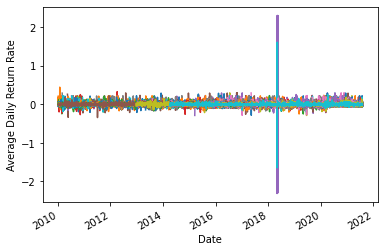

In [19]:
ret_all.plot(legend=False, ylabel='Average Daily Return Rate')

In [20]:
ret_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2852 entries, 2010-01-05 to 2021-08-02
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AALI.JK  2841 non-null   float64
 1   ACES.JK  2770 non-null   float64
 2   ADRO.JK  2832 non-null   float64
 3   AKRA.JK  2833 non-null   float64
 4   ANTM.JK  2831 non-null   float64
 5   APIC.JK  2459 non-null   float64
 6   APLN.JK  2613 non-null   float64
 7   ASII.JK  2826 non-null   float64
 8   ASSA.JK  2123 non-null   float64
 9   BBCA.JK  2832 non-null   float64
 10  BBNI.JK  2022 non-null   float64
 11  BBRI.JK  2833 non-null   float64
 12  BBTN.JK  2833 non-null   float64
 13  BDMN.JK  2824 non-null   float64
 14  BEST.JK  2262 non-null   float64
 15  BFIN.JK  2227 non-null   float64
 16  BJBR.JK  2693 non-null   float64
 17  BJTM.JK  2192 non-null   float64
 18  BMRI.JK  2831 non-null   float64
 19  BNGA.JK  2821 non-null   float64
 20  BRIS.JK  781 non-null    float64


### **Data Clean Up**

Here we can see that there are definite outliers in the data. To clean up the data, we caculate the _Z-score_ of each stock (column) and remove any value that has a _Z-score_ of above $\pm 3\sigma$.

In [21]:
from scipy import stats

In [22]:
ret= ret_all.apply(lambda col: col[np.abs(stats.zscore(col, nan_policy='omit')) < 3])

<AxesSubplot:xlabel='Date', ylabel='Average Daily Return Rate'>

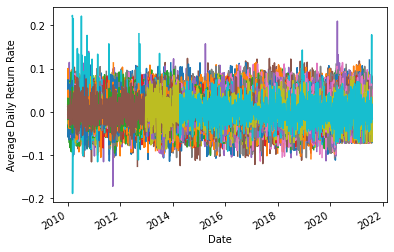

In [23]:
ret.plot(legend=False, ylabel='Average Daily Return Rate')

In [24]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2852 entries, 2010-01-05 to 2021-08-02
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AALI.JK  2800 non-null   float64
 1   ACES.JK  2732 non-null   float64
 2   ADRO.JK  2796 non-null   float64
 3   AKRA.JK  2795 non-null   float64
 4   ANTM.JK  2789 non-null   float64
 5   APIC.JK  2408 non-null   float64
 6   APLN.JK  2571 non-null   float64
 7   ASII.JK  2794 non-null   float64
 8   ASSA.JK  2091 non-null   float64
 9   BBCA.JK  2791 non-null   float64
 10  BBNI.JK  1986 non-null   float64
 11  BBRI.JK  2791 non-null   float64
 12  BBTN.JK  2791 non-null   float64
 13  BDMN.JK  2791 non-null   float64
 14  BEST.JK  2226 non-null   float64
 15  BFIN.JK  2178 non-null   float64
 16  BJBR.JK  2647 non-null   float64
 17  BJTM.JK  2149 non-null   float64
 18  BMRI.JK  2791 non-null   float64
 19  BNGA.JK  2769 non-null   float64
 20  BRIS.JK  760 non-null    float64


### **Distributions of Rate of Return**

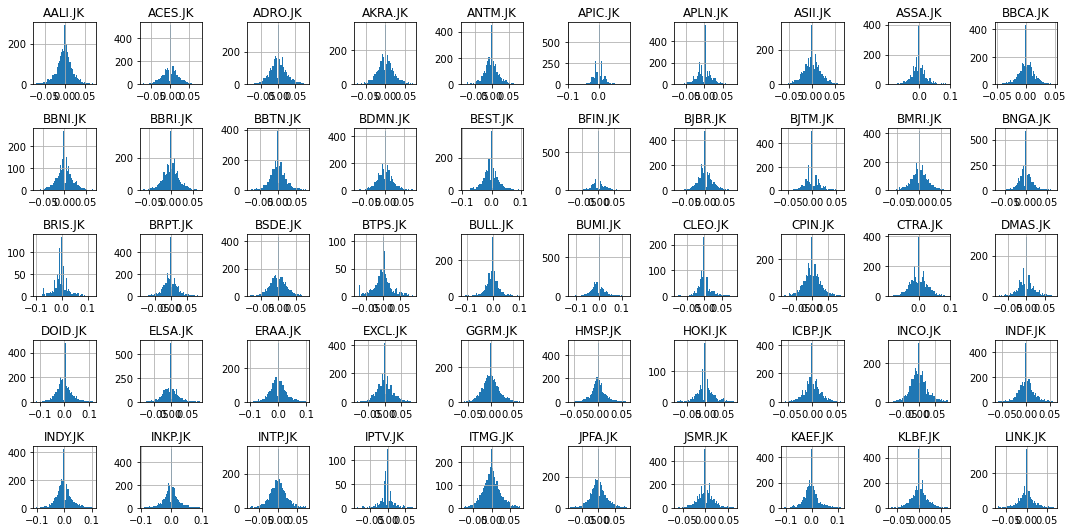

In [25]:
ret.iloc[:,0:50].hist(bins=50, figsize=(15,7.5), layout=(5,10))
plt.tight_layout()

## **Correlation Matrix of Stocks**

In [26]:
corr_matrix = ret.corr()

<AxesSubplot:>

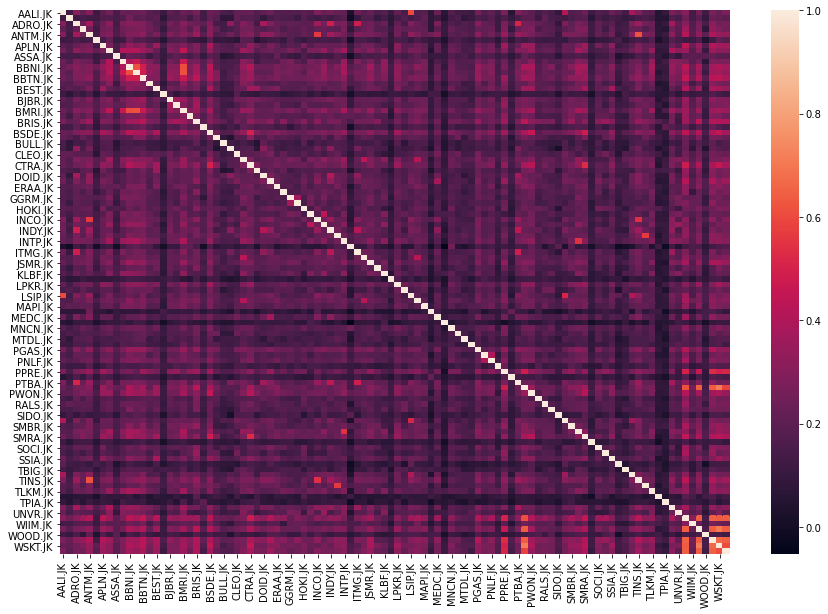

In [27]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix)

### **Correlation Score**

This is an _experimental_ variable where each stock is assigned a _score_ based on its average correlation value to other stocks in KOMPAS100. A low score may suggests that the stock is highly uncorrelated to other stocks and may help in building a highly diversified portfolio.

In [28]:
corr_score = corr_matrix.apply(lambda col: (col.sum() - 1 )/ (len(col)-1))
corr_score.sort_values().head(20)

TPIA.JK    0.080889
MIKA.JK    0.082735
TOWR.JK    0.083793
MDKA.JK    0.091518
LINK.JK    0.101508
SMSM.JK    0.102012
IPTV.JK    0.103456
BFIN.JK    0.104922
SSMS.JK    0.105919
PSAB.JK    0.110404
WOOD.JK    0.123156
SIDO.JK    0.125720
APIC.JK    0.128659
POWR.JK    0.129506
TBIG.JK    0.131299
BULL.JK    0.133031
MYOR.JK    0.138191
MTDL.JK    0.142108
ASSA.JK    0.144987
BUMI.JK    0.146172
dtype: float64

### **Market (KOMPAS100 Index) Rate of Return**

In [29]:
market_price = df2#[df2.index.isin(ret.index)]
rate_market = market_price['Close'].pct_change().apply(lambda x: np.log(1+x)).dropna()
rate_market.head()

Date
2010-01-05    0.012389
2010-01-06   -0.001602
2010-01-07   -0.006960
2010-01-08    0.010556
2010-01-11    0.006463
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='Daily Return Rate'>

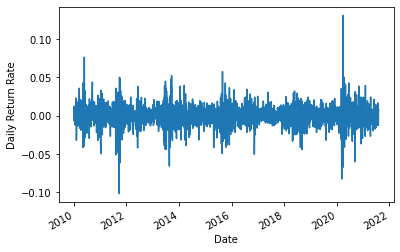

In [30]:
rate_market.plot(legend=False, ylabel='Daily Return Rate')

### **Daily Bond Yield**

In [31]:
rate_bond = bond_yield['Close'].iloc[1:].div(100)
rate_bond.head()

Date
2010-01-05    0.08137
2010-01-06    0.07899
2010-01-07    0.08379
2010-01-08    0.08377
2010-01-11    0.07615
Name: Close, dtype: float64

### Excess Return of Stocks

In [32]:
excess_ret_mar = ret.apply(lambda column: column-rate_market)

<AxesSubplot:xlabel='Date'>

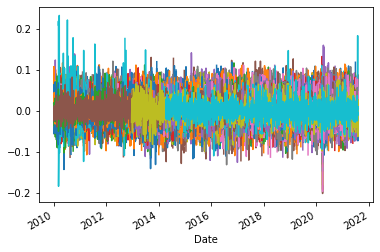

In [33]:
excess_ret_mar.plot(legend=False)

### Risk-Free Rate and Market Premium

<AxesSubplot:xlabel='Date'>

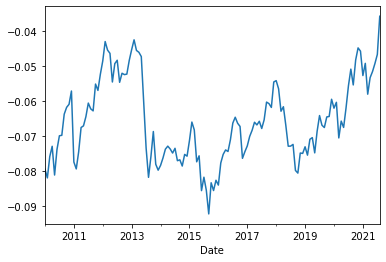

In [34]:
monthly_rf = rate_bond.resample('M').mean()
market_premium = rate_market.resample('M').mean() - monthly_rf
market_premium.plot()

### Risk Premium of Stocks - Sampled Monthly

In [35]:
monthly_ret = ret.resample('M').mean()
risk_premium = monthly_ret.apply(lambda column: column-monthly_rf)
risk_premium

,AALI.JK,ACES.JK,ADRO.JK,AKRA.JK,ANTM.JK,APIC.JK,APLN.JK,ASII.JK,ASSA.JK,BBCA.JK,...,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIIM.JK,WIKA.JK,WOOD.JK,WSBP.JK,WSKT.JK,WTON.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-0.079961,-0.081038,-0.075910,-0.081715,-0.084126,-0.079961,NaN,-0.079000,NaN,-0.080484,...,-0.081282,-0.076240,-0.078783,NaN,NaN,-0.082409,NaN,NaN,NaN,NaN
2010-02-28,-0.079784,-0.070377,-0.082248,-0.088220,-0.081804,NaN,NaN,-0.080113,NaN,-0.081883,...,-0.070438,-0.079622,-0.079627,NaN,NaN,-0.077311,NaN,NaN,NaN,NaN
2010-03-31,-0.079301,-0.075248,-0.076927,-0.084245,-0.073433,-0.021636,NaN,-0.073463,NaN,-0.076363,...,-0.081914,-0.076973,-0.077547,NaN,NaN,-0.078056,NaN,NaN,NaN,NaN
2010-04-30,-0.081110,-0.074231,-0.070721,-0.071358,-0.075240,-0.076221,NaN,-0.070600,NaN,-0.082293,...,-0.078165,-0.073327,-0.069985,NaN,NaN,-0.075144,NaN,NaN,NaN,NaN
2010-05-31,-0.090662,-0.076403,-0.088687,-0.079880,-0.093574,-0.059398,NaN,-0.088390,NaN,-0.076983,...,-0.083453,-0.086093,-0.076440,NaN,NaN,-0.080664,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-0.055473,-0.054228,-0.050046,-0.052068,-0.047631,-0.053445,-0.054031,-0.050813,-0.045131,-0.050705,...,-0.057376,-0.053866,-0.057160,-0.052333,-0.062112,-0.055844,-0.049089,-0.055103,-0.054694,-0.054974
2021-05-31,-0.058217,-0.049686,-0.049732,-0.049464,-0.051231,-0.049484,-0.052233,-0.052077,-0.048933,-0.050555,...,-0.064399,-0.046578,-0.051768,-0.052632,-0.060073,-0.058602,-0.049548,-0.057390,-0.054394,-0.053503
2021-06-30,-0.054559,-0.054855,-0.046846,-0.048784,-0.050451,-0.042298,-0.051469,-0.050341,-0.046167,-0.050131,...,-0.042254,-0.052565,-0.054543,-0.049932,-0.061268,-0.058547,-0.051746,-0.055543,-0.055168,-0.054973


### Covariance Matrix of Stocks

In [36]:
cov_matrix = ret.cov()
cov_matrix

,AALI.JK,ACES.JK,ADRO.JK,AKRA.JK,ANTM.JK,APIC.JK,APLN.JK,ASII.JK,ASSA.JK,BBCA.JK,...,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIIM.JK,WIKA.JK,WOOD.JK,WSBP.JK,WSKT.JK,WTON.JK
AALI.JK,0.000430,0.000063,0.000162,0.000096,0.000141,0.000047,0.000092,0.000101,0.000076,0.000069,...,0.000044,0.000124,0.000078,0.000172,0.000070,0.000131,0.000066,0.000124,0.000114,0.000127
ACES.JK,0.000063,0.000539,0.000077,0.000076,0.000068,0.000060,0.000086,0.000075,0.000085,0.000057,...,0.000029,0.000088,0.000055,0.000143,0.000078,0.000107,0.000055,0.000120,0.000128,0.000101
ADRO.JK,0.000162,0.000077,0.000656,0.000131,0.000221,0.000080,0.000133,0.000156,0.000092,0.000102,...,0.000061,0.000217,0.000089,0.000208,0.000109,0.000169,0.000097,0.000180,0.000167,0.000154
AKRA.JK,0.000096,0.000076,0.000131,0.000489,0.000126,0.000057,0.000119,0.000113,0.000089,0.000077,...,0.000031,0.000125,0.000073,0.000210,0.000094,0.000152,0.000045,0.000163,0.000156,0.000121
ANTM.JK,0.000141,0.000068,0.000221,0.000126,0.000540,0.000066,0.000137,0.000132,0.000100,0.000077,...,0.000061,0.000165,0.000072,0.000287,0.000109,0.000190,0.000133,0.000228,0.000210,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIKA.JK,0.000131,0.000107,0.000169,0.000152,0.000190,0.000077,0.000189,0.000144,0.000121,0.000089,...,0.000057,0.000147,0.000091,0.000468,0.000136,0.000615,0.000110,0.000382,0.000440,0.000347
WOOD.JK,0.000066,0.000055,0.000097,0.000045,0.000133,0.000017,0.000110,0.000048,0.000131,0.000021,...,0.000034,0.000067,0.000028,0.000092,0.000089,0.000110,0.000626,0.000085,0.000101,0.000076
WSBP.JK,0.000124,0.000120,0.000180,0.000163,0.000228,0.000052,0.000220,0.000145,0.000128,0.000084,...,0.000055,0.000176,0.000070,0.000394,0.000158,0.000382,0.000085,0.000512,0.000380,0.000334
WSKT.JK,0.000114,0.000128,0.000167,0.000156,0.000210,0.000089,0.000207,0.000148,0.000120,0.000092,...,0.000035,0.000154,0.000113,0.000452,0.000147,0.000440,0.000101,0.000380,0.000636,0.000319


### Semi-Covariance (for Downside Risk Calculation)

In [37]:
semicov_matrix = ret[ret < 0].cov()

### Beta 

<p> Uses the formula $\beta = \frac{Cov(r_i , r_m)}{Var(r_m)}$ where:</p>
    
<p> $Cov(r_i , r_m)$ = mar_cov </p>

<p> $Var(r_m)$ = mar_var </p>

In [38]:
mar_cov = ret.apply(lambda column: rate_market.cov(column))

In [39]:
mar_var = rate_market.var()

In [40]:
beta = mar_cov.divide(mar_var)
beta

AALI.JK    0.621688
ACES.JK    0.534926
ADRO.JK    0.909972
AKRA.JK    0.702077
ANTM.JK    0.810510
             ...   
WIKA.JK    0.924767
WOOD.JK    0.418203
WSBP.JK    0.924136
WSKT.JK    0.984864
WTON.JK    0.812602
Length: 100, dtype: float64

In [41]:
beta_prem = beta.apply(lambda x: x*market_premium).T
beta_prem

,AALI.JK,ACES.JK,ADRO.JK,AKRA.JK,ANTM.JK,APIC.JK,APLN.JK,ASII.JK,ASSA.JK,BBCA.JK,...,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIIM.JK,WIKA.JK,WOOD.JK,WSBP.JK,WSKT.JK,WTON.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-0.049450,-0.042549,-0.072381,-0.055844,-0.064469,-0.033121,-0.057781,-0.071150,-0.044914,-0.052284,...,-0.028890,-0.073001,-0.050502,-0.088342,-0.055593,-0.073558,-0.033265,-0.073507,-0.078338,-0.064636
2010-02-28,-0.050999,-0.043882,-0.074649,-0.057594,-0.066489,-0.034159,-0.059591,-0.073379,-0.046321,-0.053923,...,-0.029795,-0.075288,-0.052085,-0.091110,-0.057335,-0.075862,-0.034307,-0.075810,-0.080792,-0.066661
2010-03-31,-0.047204,-0.040616,-0.069093,-0.053308,-0.061541,-0.031617,-0.055157,-0.067918,-0.042874,-0.049910,...,-0.027578,-0.069685,-0.048209,-0.084329,-0.053068,-0.070217,-0.031754,-0.070169,-0.074780,-0.061700
2010-04-30,-0.045379,-0.039046,-0.066421,-0.051246,-0.059161,-0.030394,-0.053023,-0.065291,-0.041216,-0.047979,...,-0.026511,-0.066990,-0.046344,-0.081068,-0.051016,-0.067501,-0.030526,-0.067455,-0.071888,-0.059314
2010-05-31,-0.050486,-0.043441,-0.073898,-0.057015,-0.065820,-0.033815,-0.058992,-0.072641,-0.045855,-0.053380,...,-0.029495,-0.074531,-0.051561,-0.090193,-0.056758,-0.075099,-0.033962,-0.075048,-0.079979,-0.065990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-0.033183,-0.028552,-0.048571,-0.037474,-0.043262,-0.022226,-0.038774,-0.047744,-0.030139,-0.035085,...,-0.019386,-0.048987,-0.033889,-0.059281,-0.037305,-0.049360,-0.022322,-0.049327,-0.052568,-0.043373
2021-05-31,-0.032095,-0.027616,-0.046978,-0.036245,-0.041843,-0.021497,-0.037502,-0.046179,-0.029151,-0.033935,...,-0.018751,-0.047381,-0.032778,-0.057338,-0.036082,-0.047742,-0.021590,-0.047709,-0.050844,-0.041951
2021-06-30,-0.030672,-0.026391,-0.044895,-0.034638,-0.039988,-0.020544,-0.035839,-0.044131,-0.027858,-0.032430,...,-0.017919,-0.045280,-0.031325,-0.054795,-0.034482,-0.045625,-0.020633,-0.045594,-0.048590,-0.040091


In [42]:
alpha = risk_premium.mean() - beta_prem.mean()
alpha

AALI.JK   -0.025897
ACES.JK   -0.030606
ADRO.JK   -0.006087
AKRA.JK   -0.019809
ANTM.JK   -0.013878
             ...   
WIKA.JK   -0.004999
WOOD.JK   -0.035615
WSBP.JK   -0.004669
WSKT.JK   -0.002160
WTON.JK   -0.015254
Length: 100, dtype: float64

In [43]:
ind_er = ret.mean().apply(lambda x: (1+x)**250 - 1)
ind_er

AALI.JK   -0.159888
ACES.JK    0.090685
ADRO.JK   -0.021943
AKRA.JK    0.061907
ANTM.JK   -0.246351
             ...   
WIKA.JK    0.029523
WOOD.JK   -0.123909
WSBP.JK   -0.392903
WSKT.JK   -0.029725
WTON.JK   -0.259174
Length: 100, dtype: float64

In [44]:
ann_sd = ret.std().apply(lambda x: x*250**0.5)
ann_sd

AALI.JK    0.327895
ACES.JK    0.367077
ADRO.JK    0.405013
AKRA.JK    0.349678
ANTM.JK    0.367437
             ...   
WIKA.JK    0.392001
WOOD.JK    0.395627
WSBP.JK    0.357686
WSKT.JK    0.398764
WTON.JK    0.353699
Length: 100, dtype: float64

In [45]:
ann_semisd = ret[ret<0].std().apply(lambda x: x*250**0.5)
ann_semisd

AALI.JK    0.224465
ACES.JK    0.227827
ADRO.JK    0.252095
AKRA.JK    0.220611
ANTM.JK    0.232123
             ...   
WIKA.JK    0.242657
WOOD.JK    0.229061
WSBP.JK    0.236960
WSKT.JK    0.259856
WTON.JK    0.221499
Length: 100, dtype: float64

In [46]:
mean_bond_ret = rate_bond.mean()
excess_ret_rf = ind_er.apply(lambda x: x-mean_bond_ret)
ann_sharpe = excess_ret_rf.divide(excess_ret_rf.std())
ann_sharpe

AALI.JK   -1.094810
ACES.JK    0.117956
ADRO.JK   -0.427162
AKRA.JK   -0.021331
ANTM.JK   -1.513285
             ...   
WIKA.JK   -0.178065
WOOD.JK   -0.920674
WSBP.JK   -2.222589
WSKT.JK   -0.464826
WTON.JK   -1.575348
Length: 100, dtype: float64

In [47]:
ann_sortino = ind_er.apply(lambda x: x-mean_bond_ret).divide(ann_semisd)
ann_sortino

AALI.JK   -1.007739
ACES.JK    0.106973
ADRO.JK   -0.350096
AKRA.JK   -0.019977
ANTM.JK   -1.346977
             ...   
WIKA.JK   -0.151615
WOOD.JK   -0.830450
WSBP.JK   -1.937951
WSKT.JK   -0.369586
WTON.JK   -1.469477
Length: 100, dtype: float64

In [132]:
eps = info_summ['EPS']
per = pd.to_numeric(info_summ['P/E Ratio'], errors='coerce').fillna(0)

In [139]:
assets = pd.concat([ind_er, ann_sd, ann_semisd, ann_sharpe, ann_sortino, alpha, beta, eps, per], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Annualised Returns', 'Ann. Volatility', 'Ann. Downside Risk', 'Sharpe', 'Sortino', 'Alpha', 'Beta', 'EPS', 'P/E Ratio']
assets.sort_values(by='Beta', ascending=False)

,Annualised Returns,Ann. Volatility,Ann. Downside Risk,Sharpe,Sortino,Alpha,Beta,EPS,P/E Ratio
BRIS.JK,-0.463919,0.443447,0.293343,-2.566304,-1.807551,0.009132,1.130412,35.75,73.57
WEGE.JK,-0.248091,0.405717,0.264447,-1.521705,-1.188913,0.010215,1.110637,13.03,13.12
CPIN.JK,0.250984,0.426062,0.269293,0.893797,0.685760,0.004959,1.061547,268.11,22.84
CTRA.JK,-0.003727,0.439026,0.258840,-0.338997,-0.270597,0.000631,1.010986,74.81,11.56
SMRA.JK,0.004618,0.431101,0.260997,-0.298606,-0.236385,0.000309,1.005583,12.10,61.96
...,...,...,...,...,...,...,...,...,...
MIKA.JK,-0.005470,0.337348,0.224476,-0.347432,-0.319785,-0.045404,0.326948,67.50,38.37
SIDO.JK,-0.035914,0.253378,0.147190,-0.494779,-0.694531,-0.047903,0.312667,34.34,23.44
SMSM.JK,0.184523,0.300495,0.198952,0.572126,0.594157,-0.045798,0.301079,92.53,14.64
SSMS.JK,-0.051351,0.292220,0.197543,-0.569494,-0.595642,-0.050074,0.279395,114.41,7.30


In [50]:
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(assets)
assets_scaled = pd.DataFrame(arr_scaled, columns=assets.columns,index=assets.index)
assets_scaled = assets_scaled.sort_values(by='Alpha', ascending=False)
assets_scaled

,Mean Returns,Mean Volatility,Mean Downside Risk,Sharpe,Sortino,Alpha,Beta,EPS,P/E Ratio
WEGE.JK,0.228725,0.604990,0.574975,0.228725,0.235489,1.000000,0.976899,0.135340,0.007788
BRIS.JK,0.053002,0.735799,0.716668,0.053002,0.093521,0.982189,1.000000,0.140800,0.043673
CPIN.JK,0.635063,0.675526,0.598737,0.635063,0.665698,0.913556,0.919552,0.196643,0.013558
CTRA.JK,0.427681,0.720473,0.547479,0.427681,0.446228,0.842362,0.860486,0.150187,0.006862
SMRA.JK,0.434476,0.692998,0.558061,0.434476,0.454079,0.837067,0.854175,0.135117,0.036781
...,...,...,...,...,...,...,...,...,...
MIKA.JK,0.426262,0.367955,0.378977,0.426262,0.434940,0.085108,0.061392,0.148431,0.022777
SMSM.JK,0.580951,0.240182,0.253819,0.580951,0.644676,0.078631,0.031172,0.154446,0.008691
SIDO.JK,0.401476,0.076827,0.000000,0.401476,0.348942,0.044010,0.044709,0.140461,0.013915
SSMS.JK,0.388907,0.211493,0.246910,0.388907,0.371636,0.008296,0.005841,0.159704,0.004333


## **K-Means Clustering**

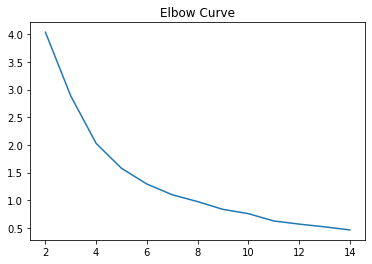

In [51]:
from sklearn.cluster import KMeans

cluster_vars = assets_scaled[['Mean Returns','Mean Volatility']]

X = cluster_vars.values 

sse = []

for k in range(2, 15):
    kmeans =KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_)
    
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

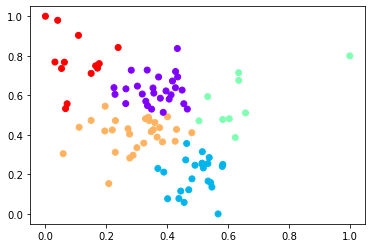

In [52]:
kmeans = KMeans(n_clusters=5).fit(X)

centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [53]:
cluster_labels = pd.DataFrame(kmeans.labels_, index= cluster_vars.index, columns=['Cluster Group'])
cluster_labels

,Cluster Group
WEGE.JK,0
BRIS.JK,4
CPIN.JK,2
CTRA.JK,0
SMRA.JK,0
...,...
MIKA.JK,3
SMSM.JK,1
SIDO.JK,1
SSMS.JK,1


In [54]:
assets_scaled_cluster = pd.concat([assets, cluster_labels], axis=1)
assets_scaled_cluster.sort_values(by='EPS', ascending=False).head(15)

,Mean Returns,Mean Volatility,Mean Downside Risk,Sharpe,Sortino,Alpha,Beta,EPS,P/E Ratio,Cluster Group
GGRM.JK,0.102811,0.303945,0.189147,0.176645,0.192957,-0.021530,0.671318,3610.88,10.28,1
UNTR.JK,-0.000011,0.354532,0.228559,-0.321009,-0.290186,-0.005725,0.917770,1731.29,11.29,3
BBCA.JK,0.167747,0.231218,0.157115,0.490934,0.645600,-0.022247,0.657321,1190.30,25.08,1
ITMG.JK,-0.053633,0.379420,0.238630,-0.580536,-0.502645,-0.017012,0.748866,873.58,19.40,0
INDF.JK,0.127316,0.279156,0.176684,0.295247,0.345260,-0.021475,0.669286,772.26,7.87,1
INKP.JK,-0.157788,0.417720,0.280877,-1.084642,-0.797862,-0.011169,0.844800,672.45,10.11,0
AALI.JK,-0.159888,0.327895,0.224465,-1.094810,-1.007739,-0.025897,0.621688,566.60,14.03,3
ICBP.JK,0.142805,0.270389,0.174915,0.370214,0.437304,-0.026897,0.588100,543.76,14.94,1
INTP.JK,-0.093657,0.354080,0.234856,-0.774251,-0.681143,-0.005560,0.921251,522.35,16.85,3
SMGR.JK,-0.056427,0.336316,0.217542,-0.594062,-0.564218,-0.008061,0.884368,471.42,16.33,3


In [107]:
kmeans_mean = assets_scaled_cluster.groupby(['Cluster Group']).mean().sort_values(by='Mean Returns', ascending=False)

## **PCA Clustering**

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(assets_scaled)

assets_PCA = pd.DataFrame(data = principalComponents, index=assets_scaled.index
             , columns = ['principal component 1', 'principal component 2'])

assets_PCA

,principal component 1,principal component 2
WEGE.JK,0.678884,-0.213502
BRIS.JK,0.918744,0.030245
CPIN.JK,0.330165,-0.687887
CTRA.JK,0.431919,-0.352862
SMRA.JK,0.414181,-0.355731
...,...,...
MIKA.JK,-0.536938,0.288690
SMSM.JK,-0.790196,0.047230
SIDO.JK,-0.798445,0.296318
SSMS.JK,-0.684337,0.374219


In [57]:
X_pca = assets_PCA.values

In [58]:
kmeans = KMeans(n_clusters=5).fit(X_pca)

centroids = kmeans.cluster_centers_

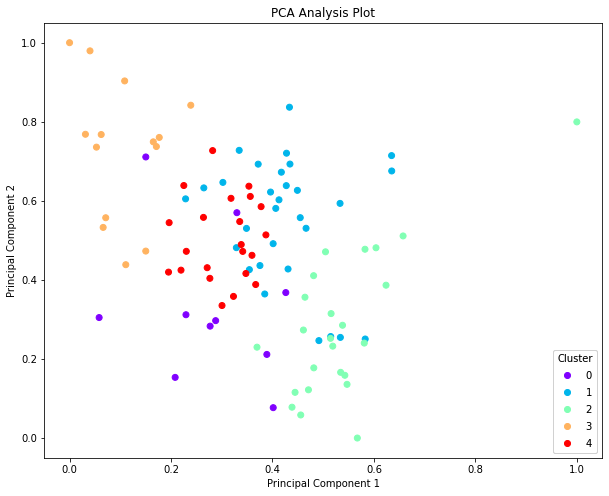

In [91]:
fig, ax = plt.subplots(figsize=[10,8])
scatter = ax.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax.set_title('PCA Analysis Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.add_artist(legend1)
plt.show()

In [60]:
cluster_labels_pca = pd.DataFrame(kmeans.labels_, index= assets_PCA.index, columns=['Cluster Group (PCA)'])
assets_scaled_cluster_pca = pd.concat([assets, cluster_labels_pca], axis=1)
assets_scaled_cluster_pca.sort_values(by='Sharpe', ascending=False).head(15)

,Mean Returns,Mean Volatility,Mean Downside Risk,Sharpe,Sortino,Alpha,Beta,EPS,P/E Ratio,Cluster Group (PCA)
TOWR.JK,0.699210,0.461864,0.295399,3.063191,2.142514,-0.039025,0.385183,62.05,23.61,2
MDKA.JK,0.278522,0.378657,0.262163,1.027080,0.809451,-0.044207,0.326962,6.37,464.59,2
CPIN.JK,0.250984,0.426062,0.269293,0.893797,0.685760,0.004959,1.061547,268.11,22.84,1
MAPI.JK,0.250674,0.437273,0.260100,0.892297,0.708807,-0.007016,0.879197,-32.39,0.00,1
CLEO.JK,0.237224,0.342720,0.215386,0.827197,0.793506,-0.022392,0.595316,13.32,34.39,2
TPIA.JK,0.212912,0.370032,0.273128,0.709527,0.536736,-0.041242,0.363205,199.53,47.11,2
BBRI.JK,0.186806,0.303466,0.198337,0.583175,0.607511,-0.004148,0.930646,140.45,26.41,1
BFIN.JK,0.186292,0.368955,0.261176,0.580690,0.459378,-0.043223,0.332236,57.27,16.33,2
SMSM.JK,0.184523,0.300495,0.198952,0.572126,0.594157,-0.045798,0.301079,92.53,14.64,2
BBCA.JK,0.167747,0.231218,0.157115,0.490934,0.645600,-0.022247,0.657321,1190.30,25.08,2


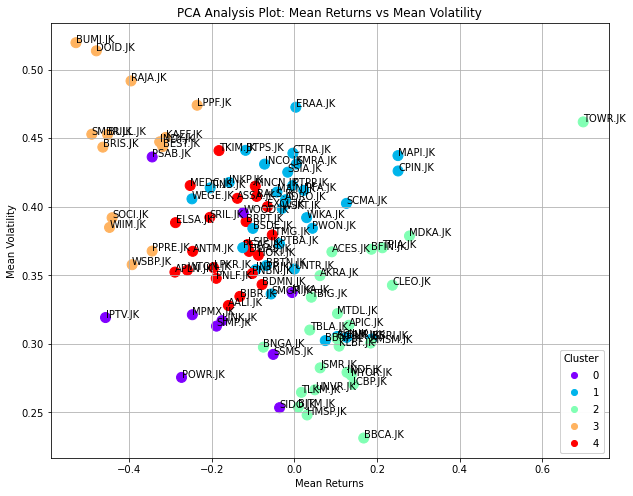

In [96]:
#hideme
fig, ax = plt.subplots()
ax1= assets_scaled_cluster_pca.plot.scatter(x='Mean Returns', y='Mean Volatility', c= 'Cluster Group (PCA)', 
                                           cmap= 'rainbow', marker='.', s=400, grid=True, 
                                           figsize=[10,8], ax=ax, colorbar=False,
                                           title='PCA Analysis Plot: Mean Returns vs Mean Volatility' )

legend1 = ax1.legend(*scatter.legend_elements(),loc="lower right", title="Cluster")
ax1.add_artist(legend1)

labels = [assets_scaled_cluster_pca.index]

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(assets_scaled_cluster_pca['Mean Returns'], assets_scaled_cluster_pca['Mean Volatility'], 
            assets_scaled_cluster_pca.index.to_series(), ax1)


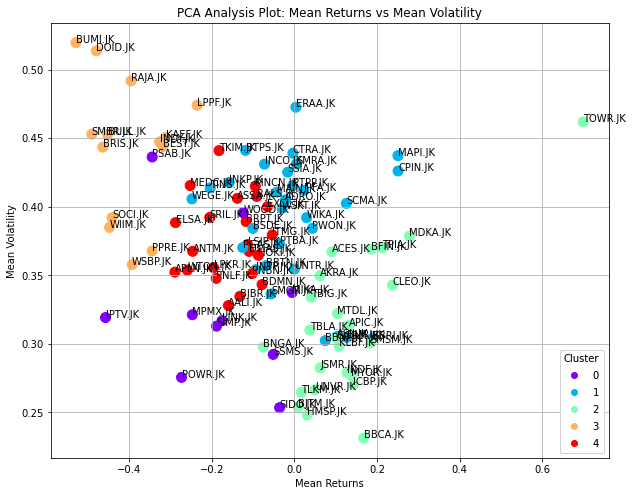

In [67]:
cluster_mean = assets_scaled_cluster_pca.groupby(['Cluster Group (PCA)']).mean().sort_values(by='Mean Returns', ascending=False)

In [86]:
selected_cluster = cluster_mean.index[0]

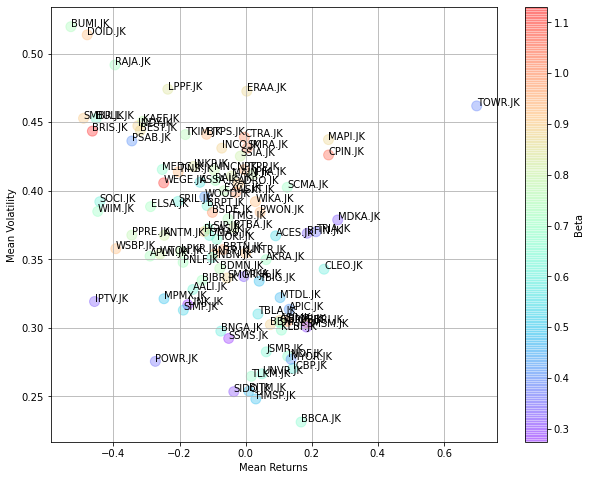

In [87]:
fig, ax = plt.subplots()
ax= assets_scaled_cluster_pca.plot.scatter(x='Mean Returns', y='Mean Volatility', c= 'Beta', 
                                           cmap= 'rainbow', marker='.', 
                                           s=400, alpha=0.3, grid=True, 
                                           figsize=[10,8], ax=ax)
labels = [assets.index]

label_point(assets['Mean Returns'], assets['Mean Volatility'], assets.index.to_series(), ax)

In [88]:
sel_assets = assets_scaled_cluster_pca[assets_scaled_cluster_pca['Cluster Group (PCA)']==selected_cluster]
#assets.sort_values(by='Beta', ascending=False).iloc[:15]
sel_assets_ret = sel_assets['Mean Returns']
sel_assets_ret

ACES.JK    0.090685
AKRA.JK    0.061907
APIC.JK    0.131920
BBCA.JK    0.167747
BFIN.JK    0.186292
BJTM.JK    0.009589
BNGA.JK   -0.075190
CLEO.JK    0.237224
GGRM.JK    0.102811
HMSP.JK    0.030701
ICBP.JK    0.142805
INDF.JK    0.127316
JSMR.JK    0.062320
KLBF.JK    0.108232
MDKA.JK    0.278522
MTDL.JK    0.104213
MYOR.JK    0.137506
SMSM.JK    0.184523
TBIG.JK    0.040978
TBLA.JK    0.037153
TLKM.JK    0.016964
TOWR.JK    0.699210
TPIA.JK    0.212912
UNVR.JK    0.049397
Name: Mean Returns, dtype: float64

In [97]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_dsrisk = []
p_weights = [] # Define an empty array for asset weights
p_sharpe = [] # Define an empty array for Sharpe's ratio
p_sortino = [] 
rf_rate = monthly_rf.mean()  # Average risk-free rate in Indonesia from average return of gov't bonds
assets_sel = sel_assets_ret
ret_assets = ret[assets_sel.index]
cov = ret_assets.cov()
semicov = ret_assets[ret_assets < rf_rate].cov()
num_assets = len(assets_sel)
num_portfolios = 500000

In [98]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,assets_sel) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    std = sd*np.sqrt(252) # Annual standard deviation = volatility
    p_vol.append(std)
    excess = assets_sel - rf_rate
    sharpe = (returns - rf_rate)/std
    p_sharpe.append(sharpe)    
    semivar = semicov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Semivariance
    semisd = np.sqrt(semivar) # Daily standard deviation
    semistd = semisd*np.sqrt(252) # Annual standard deviation = volatility
    p_dsrisk.append(semistd)
    sortino = (returns - rf_rate)/semistd
    p_sortino.append(sortino)

In [99]:
 data = {'Returns':p_ret, 'Volatility':p_vol, 'Downside Risk' : p_dsrisk, 'Sharpe Ratio' :p_sharpe, 'Sortino': p_sortino}

for counter, symbol in enumerate(sel_assets.index.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [100]:
portfolios  = pd.DataFrame(data)
portfolios.tail() # Dataframe of the 50000 portfolios created

,Returns,Volatility,Downside Risk,Sharpe Ratio,Sortino,ACES.JK weight,AKRA.JK weight,APIC.JK weight,BBCA.JK weight,BFIN.JK weight,...,MDKA.JK weight,MTDL.JK weight,MYOR.JK weight,SMSM.JK weight,TBIG.JK weight,TBLA.JK weight,TLKM.JK weight,TOWR.JK weight,TPIA.JK weight,UNVR.JK weight
499995,0.135218,0.131578,0.128184,0.524805,0.538702,0.060557,0.024173,0.061696,0.056338,0.035019,...,0.035414,0.041439,0.051122,0.002153,0.031091,0.056613,0.048740,0.045850,0.041827,0.052423
499996,0.140618,0.131486,0.127531,0.566243,0.583801,0.051763,0.037894,0.004836,0.012999,0.031508,...,0.027687,0.070959,0.062861,0.061111,0.036633,0.053700,0.030629,0.059314,0.054273,0.067369
499997,0.114438,0.134332,0.131294,0.359357,0.367672,0.065162,0.048790,0.023834,0.034568,0.013419,...,0.076047,0.051459,0.059178,0.022527,0.076101,0.003515,0.007830,0.016668,0.051204,0.001516
499998,0.120627,0.132266,0.129333,0.411762,0.421101,0.072042,0.029380,0.038031,0.060421,0.072215,...,0.032617,0.073797,0.032201,0.024162,0.046309,0.051421,0.005212,0.019138,0.042676,0.049928
499999,0.122874,0.133805,0.130420,0.423815,0.434816,0.060245,0.041057,0.061786,0.008810,0.065943,...,0.002665,0.059828,0.042766,0.025262,0.041488,0.067605,0.048664,0.021571,0.069326,0.074849


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

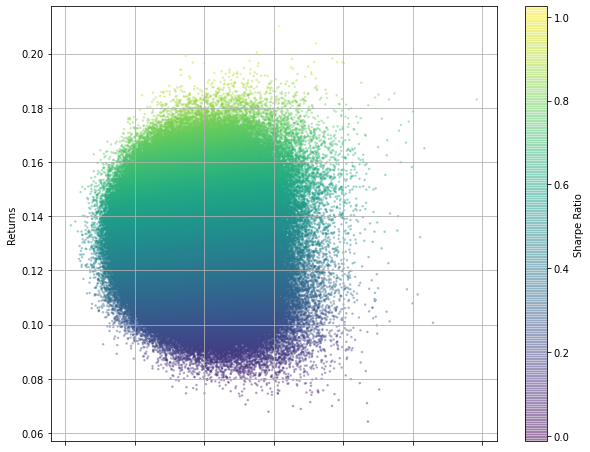

In [101]:
portfolios.plot.scatter(x='Volatility', y='Returns', c= 'Sharpe Ratio', cmap= 'viridis',
                        marker='.', s=10, alpha=0.3, grid=True, figsize=[10,8])

In [102]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.136642
Volatility        0.125407
Downside Risk     0.121907
Sharpe Ratio      0.561985
Sortino           0.578120
ACES.JK weight    0.046809
AKRA.JK weight    0.001769
APIC.JK weight    0.048036
BBCA.JK weight    0.057565
BFIN.JK weight    0.042703
BJTM.JK weight    0.071596
BNGA.JK weight    0.023774
CLEO.JK weight    0.023868
GGRM.JK weight    0.030152
HMSP.JK weight    0.041172
ICBP.JK weight    0.022522
INDF.JK weight    0.035460
JSMR.JK weight    0.047080
KLBF.JK weight    0.018979
MDKA.JK weight    0.044220
MTDL.JK weight    0.067735
MYOR.JK weight    0.077988
SMSM.JK weight    0.076553
TBIG.JK weight    0.048091
TBLA.JK weight    0.024421
TLKM.JK weight    0.000486
TOWR.JK weight    0.029884
TPIA.JK weight    0.078305
UNVR.JK weight    0.040834
Name: 160719, dtype: float64

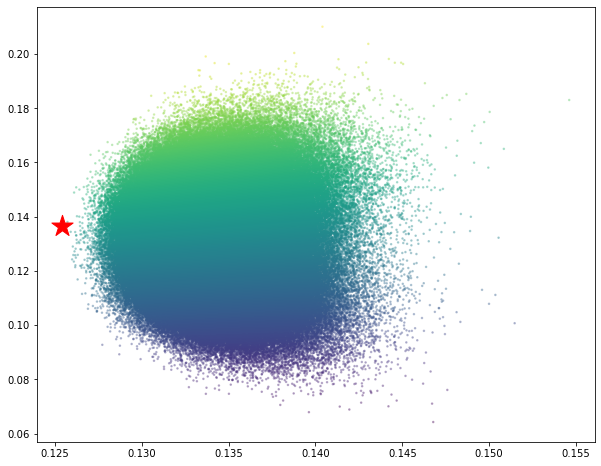

In [103]:
plt.subplots(figsize=[10,8])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c= portfolios['Sharpe Ratio'],marker='.', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.show()

In [104]:
optimal_risky_port = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]
optimal_risky_port

Returns           0.210090
Volatility        0.140401
Downside Risk     0.131009
Sharpe Ratio      1.025100
Sortino           1.098592
ACES.JK weight    0.049112
AKRA.JK weight    0.009974
APIC.JK weight    0.073003
BBCA.JK weight    0.024035
BFIN.JK weight    0.098597
BJTM.JK weight    0.048721
BNGA.JK weight    0.004940
CLEO.JK weight    0.041461
GGRM.JK weight    0.077291
HMSP.JK weight    0.006058
ICBP.JK weight    0.016294
INDF.JK weight    0.072866
JSMR.JK weight    0.001335
KLBF.JK weight    0.022453
MDKA.JK weight    0.111588
MTDL.JK weight    0.008023
MYOR.JK weight    0.002229
SMSM.JK weight    0.073079
TBIG.JK weight    0.006166
TBLA.JK weight    0.009960
TLKM.JK weight    0.008477
TOWR.JK weight    0.109206
TPIA.JK weight    0.072138
UNVR.JK weight    0.052995
Name: 295814, dtype: float64

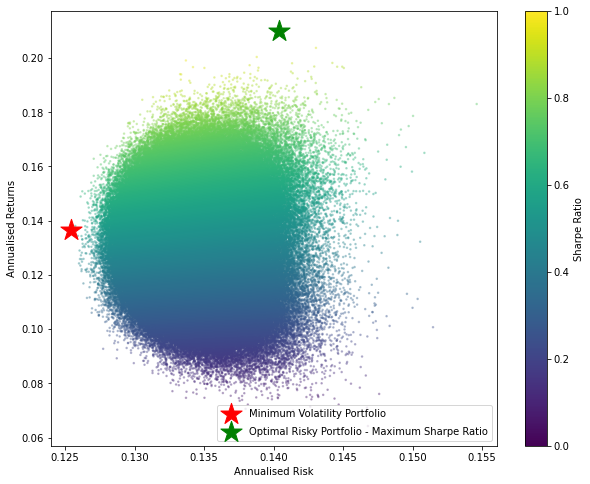

----------
Optimally Risky Portfolio
----------
Returns           0.210090
Volatility        0.140401
Downside Risk     0.131009
Sharpe Ratio      1.025100
Sortino           1.098592
ACES.JK weight    0.049112
AKRA.JK weight    0.009974
APIC.JK weight    0.073003
BBCA.JK weight    0.024035
BFIN.JK weight    0.098597
BJTM.JK weight    0.048721
BNGA.JK weight    0.004940
CLEO.JK weight    0.041461
GGRM.JK weight    0.077291
HMSP.JK weight    0.006058
ICBP.JK weight    0.016294
INDF.JK weight    0.072866
JSMR.JK weight    0.001335
KLBF.JK weight    0.022453
MDKA.JK weight    0.111588
MTDL.JK weight    0.008023
MYOR.JK weight    0.002229
SMSM.JK weight    0.073079
TBIG.JK weight    0.006166
TBLA.JK weight    0.009960
TLKM.JK weight    0.008477
TOWR.JK weight    0.109206
TPIA.JK weight    0.072138
UNVR.JK weight    0.052995
Name: 295814, dtype: float64
----------
----------
Minimal Risk Portfolio
----------
Returns           0.136642
Volatility        0.125407
Downside Risk     0.121907
Sha

In [108]:
plt.subplots(figsize=(10, 8))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c= portfolios['Sharpe Ratio'],marker='.', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500, label= 'Minimum Volatility Portfolio')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500, label = 'Optimal Risky Portfolio - Maximum Sharpe Ratio')
plt.legend(labelspacing=0.8, loc='lower right')
plt.colorbar().set_label('Sharpe Ratio')
plt.xlabel('Annualised Risk')
plt.ylabel('Annualised Returns')
plt.show()
print('-'*10)
print('Optimally Risky Portfolio')
print('-'*10)
print(optimal_risky_port)
print('-'*10)
print('-'*10)
print('Minimal Risk Portfolio')
print('-'*10)
print(min_vol_port)